# Desafio de exploração de dados de voos // Flight data exploration challenge
Nesse desafio, vou explorar um conjunto de dados do mundo real, contendo dados do departamento de transporte dos Estados Unidos.

Vamos começar carregando e vizualizando os dados.

----------------------------------------------------------------

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [52]:
import urllib.request
import pandas as pd

#importação de arquivo csv usado para desafio
import urllib.request
url = 'https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/flights.csv'
file_name = 'flights.csv'
urllib.request.urlretrieve(url, file_name)

#leitura do .csv e descrição inicial
df_flights = pd.read_csv('flights.csv',delimiter=',',header='infer')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


O conjunto de dados contem observações dos vôos domésticos do EUA em 2013, e consiste nos seguintes campos:
* Year: Ano do vôo (todos os registros são de 2013)
* Month: Mês do vôo
* DayofMonth: Dia do mês em que o vôo partiu
* DayOfWeek: Dia do semana em que o vôo partiu (de 1 (segunda-feira) à 7 (domingo))
* Carrier: A abreviação de duas letras da companhia aérea.
* OriginAirportID: Um identificador numérico exclusivo para o aeroporto de partida
* OriginAirportName: O nome completo do aeroporto de partida
* OriginCity: A cidade do aeroporto de partida
* OriginState: O estado do aeroporto de partida
* DestAirportID: Um identificador numérico exclusivo para o aeroporto de destino
* DestAirportName: O nome completo do aeroporto de destino
* DestCity: A cidade do aeroporto de destino
* DestState: O estado do aeroporto de destino
* CRSDepTime: A hora de partida programada
* DepDelay: O número de minutos de atraso da partida (voo que saiu antes do horário tem valor negativo)
* DelDelay15: Um indicador binário de que a partida foi atrasada em mais de 15 minutos (e, portanto, considerada "atrasada")
* CRSArrTime: A hora prevista de chegada
* ArrDelay: O número de minutos que a chegada atrasou (voos que chegaram antes do horário têm valor negativo)
* ArrDelay15: Um indicador binário de que a chegada foi atrasada em mais de 15 minutos (e, portanto, considerada "atrasada")
* Cancelled: Um indicador binário de que o voo foi cancelado

O desafio se trata de explorar os dados do voo para analisar possíveis fatores que afetam os atrasos na partida ou na chegada de um voo.

- Começo limpando os dados.
     - Identifico quaisquer dados nulos ou ausentes e atribuo valores de substituição apropriados.
     - Identifico e elimino quaisquer outliers nas colunas 'DepDelay' e 'ArrDelay'.


- Exploro os dados limpos.
     - Vejo as estatísticas resumidas dos campos numéricos no conjunto de dados.
     - Determino a distribuição das colunas 'DepDelay' e 'ArrDelay'.
     - Uso estatísticas, funções agregadas e visualizações para responder às seguintes perguntas:
        - Quais são os atrasos médios de partida e chegada?
        - Como as transportadoras se comparam em termos de desempenho de atraso de chegada?
        - Existe uma diferença perceptível nos atrasos de chegada para diferentes dias da semana?
        - Qual aeroporto de partida tem o maior atraso médio de partida?
        - Partidas tardias* tendem a resultar em atrasos de chegada mais longos do que partidas pontuais?*
        - Qual rota (do aeroporto de origem ao aeroporto de destino) tem chegadas mais tardias*?*
        - Qual rota tem o maior atraso médio de chegada?

Durante o notebook existem markdowns e comentários nos códigos que ajudam a entender as soluções.

Nota: Não existe uma solução "correta" única. Uma solução de amostra é fornecida em [01 - Flights Challenge.ipynb](https://github.com/MicrosoftDocs/ml-basics/blob/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/01%20-%20Flights%20Solution.ipynb).

----------------------------------------------------------------

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

* Year: The year of the flight (all records are from 2013)
* Month: The month of the flight
* DayofMonth: The day of the month on which the flight departed
* DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
* Carrier: The two-letter abbreviation for the airline.
* OriginAirportID: A unique numeric identifier for the departure aiport
* OriginAirportName: The full name of the departure airport
* OriginCity: The departure airport city
* OriginState: The departure airport state
* DestAirportID: A unique numeric identifier for the destination aiport
* DestAirportName: The full name of the destination airport
* DestCity: The destination airport city
* DestState: The destination airport state
* CRSDepTime: The scheduled departure time
* DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
* DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
* CRSArrTime: The scheduled arrival time
* ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
* ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
* Cancelled: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

- Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the DepDelay and ArrDelay columns.


- Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the DepDelay and ArrDelay columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - What are the average (mean) departure and arrival delays?
        - How do the carriers compare in terms of arrival delay performance?
        - Is there a noticable difference in arrival delays for different days of the week?
        - Which departure airport has the highest average departure delay?
        - Do late* departures tend to result in longer arrival delays than on-time departures?*
        - Which route (from origin airport to destination airport) has the most late* arrivals?*
        - Which route has the highest average arrival delay?

Add markdown and code cells as required to create your solution.

Note: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](https://github.com/MicrosoftDocs/ml-basics/blob/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/01%20-%20Flights%20Solution.ipynb).

# Limpando dados // Cleaning Data

## Identificando valores nulos/faltantes // Identifying null/missing values

In [53]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Há valores nulos na coluna 'DepDel15'.
Podemos então ver os dados de quantos minutos tivemos de delay nestas mesmas linhas.

----------------------------------------------------------------

There are null values in column 'DepDel15'.
We can then see the data of how many minutes we had of delay in these same lines.

In [54]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

#Selecionando as linhas que contêm valores nulos em pelo menos uma coluna usando o método "isnull()".
#O parâmetro "axis=1" especifica que a verificação de nulos deve ser feita nas colunas (ou eixo horizontal) em vez das linhas (ou eixo vertical) do DataFrame.

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


Aparentemente, os delays estão com tempo igual a zero. Mas não podemos ver o real tempo de todos os 2761 casos. 
Neste caso, podemos olhar as estatísticas destes dados para validar a informação acima.

----------------------------------------------------------------

Apparently, the delays are all at zero time. But, we can't see the real time of all 2761 cases. 
In that case, we can look at their static to validate the above information.

In [55]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

Considerando que os valores estão realmente zerados em todos os casos, podemos aplicar o valor 'False' para todos os 'DepDel15' nulos.

----------------------------------------------------------------

Assuming all values are truly 0, we can aplly the value 'False' to all nulls 'DepDel15'.

In [56]:
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Eliminando outliers nas colunas DepDelay e ArrDelay // Eliminate outliers on DepDelay and Arrdelay columns.

In [57]:
%matplotlib inline

from matplotlib import pyplot as plt

Agora devemos identificar e eliminar qualquer outlier nas colunas 'DepDelay' e 'ArrDelay'.

Um outlier pode ser definido basicamente quando um valor está significantemente fora do intervalo do resto da distribuição.

----------------------------------------------------------------

Now we need to identify and eliminate any outlier on 'DepDelay' and 'ArrDelay'.

An outlier can basically be defined when a value is significantly outside the distribuiton range.

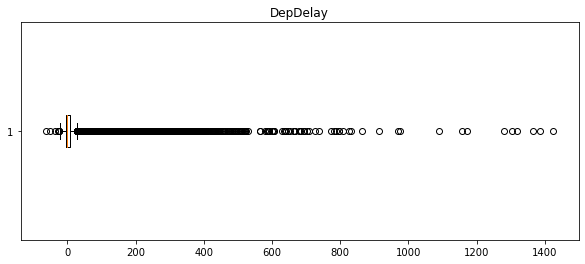

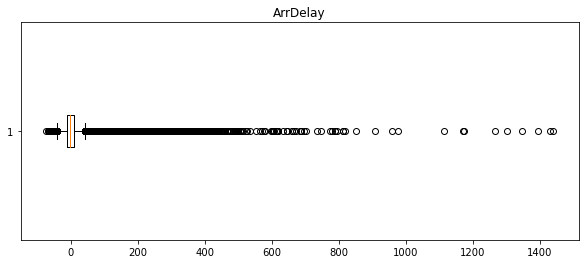

In [58]:
def describe_data(var_data):
    fig = plt.figure(figsize=(10,4))
    plt.boxplot(var_data, vert=False)
    plt.title(var_data.name)
    plt.show()

# Chama a função para cada coluna definida
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    describe_data(df_flights[col])

Acima, podemos ver alguns valores nos dois casos que estão fora da distribuição destes dados, tanto acima quanto abaixo.
Para considerarmos o que entra na distruição, podemos optar por trabalhar com dados entre o 1° e 95° percentil, isto provavelmente nos mostra a maior concentração dos dados.

Percentis são medidas estatísticas que dividem um conjunto de dados ordenados em 100 partes iguais, ou seja, o 1º percentil representa o valor abaixo do qual se encontra 1% dos dados, o 50º percentil (também conhecido como mediana) representa o valor abaixo do qual se encontra 50% dos dados e assim por diante. Trabalhar com percentis é uma forma útil de filtrar dados relevantes, excluir valores extremos e detectar outliers em um
conjunto de dados. 

----------------------------------------------------------------

Above, we can see some values in both cases that are outside the distribution of these data, both above and below.
To consider what goes into the distribution, we can choose to work with data between the 1st and 95th percentile, this probably shows us the highest concentration of data.

Percentiles are statistical measures that divide a set of ordered data into 100 equal parts, that is, the 1st percentile represents the value below which 1% of the data is found, the 50th percentile (also known as median) represents the value below which 50% of the data is found, and so on. Working with percentiles is a useful way to filter relevant data, exclude extreme values and detect outliers in a
data set.

In [59]:
#Cálculo dos percentis
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.95)

DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.95)

#Reinserção dos valores limpos
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]


Para avaliar se, deste modo, os outliers foram realmente removidos plotamos o gráfico novamente.

----------------------------------------------------------------

To assess whether, in this way, the outliers were really removed, we plott the graph again.

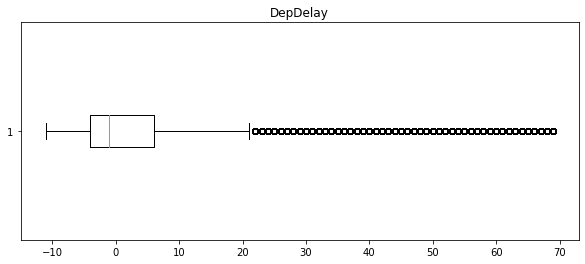

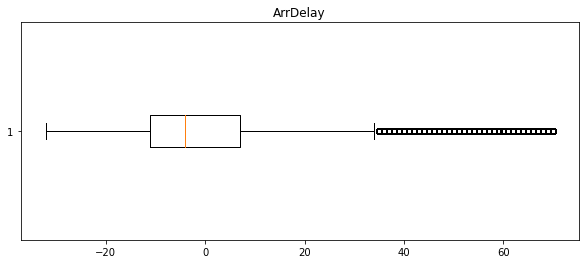

In [60]:
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    describe_data(df_flights[col])

Com a visão dos gráficos acima, podemos ver que outlier foram removidos e os dados aparentam estar mais limpos.

Vale a análise mais crítica que seria feita, por exemplo, para entender o porquê daqueles valores estarem se distanciando do "padrão". 

Outliers podem ser causados por erros de medida, erros de entrada de dados ou por valores atípicos que representam eventos ou situações incomuns. Identificar e lidar com outliers é importante para evitar distorções na análise estatística dos dados.

----------------------------------------------------------------

With the view of the graphs above, we can see that outliers have been removed and the data appears to be cleaner.

It is worth the most critical analysis that would be done, for example, to understand why those values are moving away from the "standard".

Outliers can be caused by measurement errors, data entry errors, or outliers that represent unusual events or situations. Identifying and dealing with outliers is important to avoid distortions in the statistical analysis of the data.

# Explorando os dados limpos // Exploring the cleaned data

## Explorando as estatísticas gerais // Exploring overview statistics 

Para explorar os dados podemos começar com um overall dos dados númericos e suas estatísticas.

----------------------------------------------------------------

To explore data, we can start with an numeric data and statistics overall.

In [61]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,250861.0,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000
mean,2013.0,6.998071,15.819155,3.902380,12747.322453,12736.027569,1311.783203,3.915599,0.154839,1492.507106,-0.086311,0.171808,0.011469
std,0.0,1.991290,8.816356,1.990234,1505.701718,1505.575497,469.974665,14.081157,0.361752,490.551486,17.333704,0.377214,0.106475
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,910.000000,-4.000000,0.000000,1112.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1306.000000,-1.000000,0.000000,1515.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1714.000000,6.000000,0.000000,1909.000000,7.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,69.000000,1.000000,2359.000000,70.000000,1.000000,1.000000


Para entender por que os voos estão atrasados (tanto na chegada quanto na partida), podemos começar observando a distribuição dos atrasos (ArrDelay e DepDelay).

----------------------------------------------------------------

To understand why flights are delayed (both on arrival and departure), we can start by looking at delays distribution (ArrDelay and DepDelay).

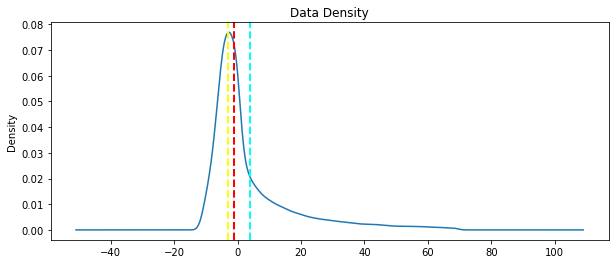

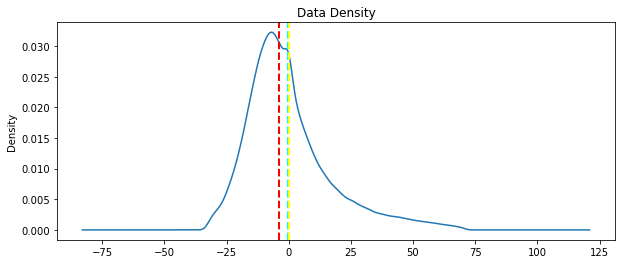

In [62]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

var_columns = ['DepDelay', 'ArrDelay']
for var in var_columns:
    show_density(df_flights[var])

Acima, podemos ver que os dados seguem uma curva em 'sino', o que podemos chamar de distribuição normal.
Agora, remoldando os gráficos podemos ver outras estatísticas que podem ser interessantes.

----------------------------------------------------------------

Above, we can see that the data follow a 'bell' curve, or what we can call a normal distribution.
Now, reshaping the graphs we can see other statistics that might be interesting.

## Estatísticas gerais de atraso // Overall delays statistics

Valores para  DepDelay 

V.Mínimo:-11.00
Média:3.92
Mediana:-1.00
Moda:-3.00
V.Máximo:69.00



Valores para  ArrDelay 

V.Mínimo:-32.00
Média:-0.09
Mediana:-4.00
Moda:0.00
V.Máximo:70.00





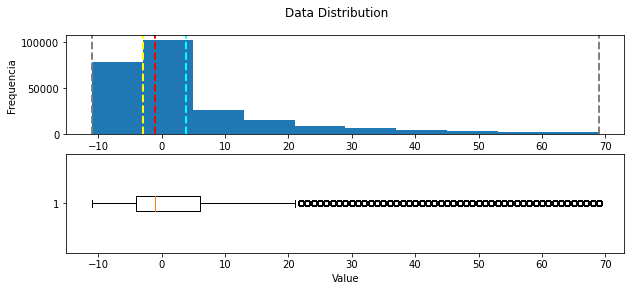

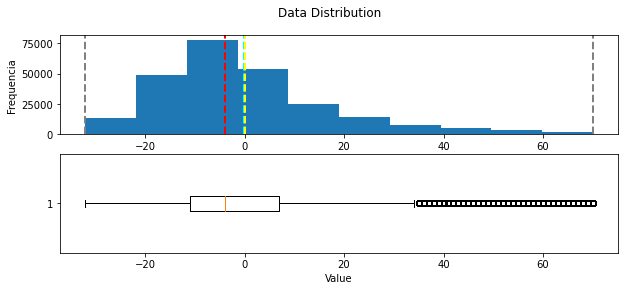

In [63]:
def show_distribution(var_data):

    # Pegando estatísticas 
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('V.Mínimo:{:.2f}\nMédia:{:.2f}\nMediana:{:.2f}\nModa:{:.2f}\nV.Máximo:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plotando histograma
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequencia')

    # Adicionando linhas para média, mediana e moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotando o boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

var_columns = ['DepDelay', 'ArrDelay']
for var in var_columns:
    print("Valores para ", var,'\n')
    show_distribution(df_flights[var])
    print('\n')

Atrasos médios (minutos):

    - DepDelay: 3.92 
    - ArrDelay: -0.09

Este dado nos indica que, geralmente, as linhas aéreas têm se mantido pontuais.

----------------------------------------------------------------

Average delays (minutes):

     - DepDelay: 3.92
     - ArrDelay: -0.09

This data indicates that, generally, airlines have remained punctual.

## Análise de atraso na chegada de voos // Flight arrival delay analysis

In [64]:
import seaborn as sns

Text(0, 0.5, 'Atraso (min)')

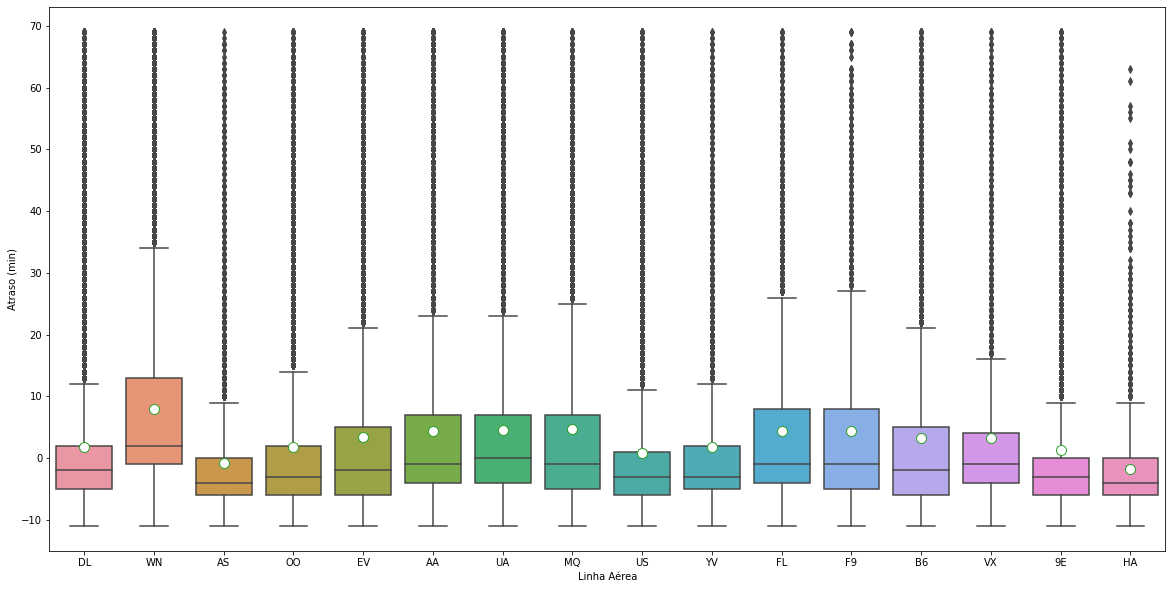

In [65]:
# Qual das companhias atrasam mais na saída?

# Fazer um gráfico onde x -> companhia y -> qntd. de vezes que atrasou

data = pd.DataFrame({'Carrier': df_flights['Carrier'], 'DepDelay': df_flights['DepDelay'].astype(int)})


# criando o boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x="Carrier", y="DepDelay", data=data, showmeans=True, meanprops={"marker": "o", 
                "markerfacecolor": "white", "markersize": 10})


# configurando os eixos
plt.xlabel("Linha Aérea")
plt.ylabel("Atraso (min)")

In [66]:
# Calculando as médias
means = df_flights.groupby('Carrier')['DepDelay'].mean()

# Imprimindo as médias
for airline, mean in means.items():
    print(f"Média de atraso para a linha aérea {airline}: {mean}\n")

Média de atraso para a linha aérea 9E: 1.3083333333333333

Média de atraso para a linha aérea AA: 4.439230798292342

Média de atraso para a linha aérea AS: -0.8040662403672734

Média de atraso para a linha aérea B6: 3.2099187292205396

Média de atraso para a linha aérea DL: 1.7416593261396167

Média de atraso para a linha aérea EV: 3.425982954952374

Média de atraso para a linha aérea F9: 4.352652560564244

Média de atraso para a linha aérea FL: 4.336798811835942

Média de atraso para a linha aérea HA: -1.703229398663697

Média de atraso para a linha aérea MQ: 4.657123314442056

Média de atraso para a linha aérea OO: 1.734038281354571

Média de atraso para a linha aérea UA: 4.623919981318596

Média de atraso para a linha aérea US: 0.7798801639861243

Média de atraso para a linha aérea VX: 3.2289615751032072

Média de atraso para a linha aérea WN: 7.913665417277781

Média de atraso para a linha aérea YV: 1.7767422156322812



Como podemos perceber, tanto no gráfico quanto na tabela listada, a linha aérea 'WN' é a que mais se atrasou na chegada de aeronaves. 

Para esta análise, considero atrasos menores ou iguais a 15 minutos como chegadas pontuais. Sendo assim, agora particularmente falando, todas as empresas conseguiram ser pontuais.

----------------------------------------------------------------

As we can see, both in the graph and in the table listed, the 'WN' airline is the one that was most delayed in the arrival of aircraft.

For this analysis, I consider delays less than or equal to 15 minutes as punctual arrivals. So, now particularly speaking, all companies managed to be punctual.

## Relação entre o dia da semana e atrasos em partidas // Relationship between the day of the week and departure delays

Text(0, 0.5, 'Atraso (min)')

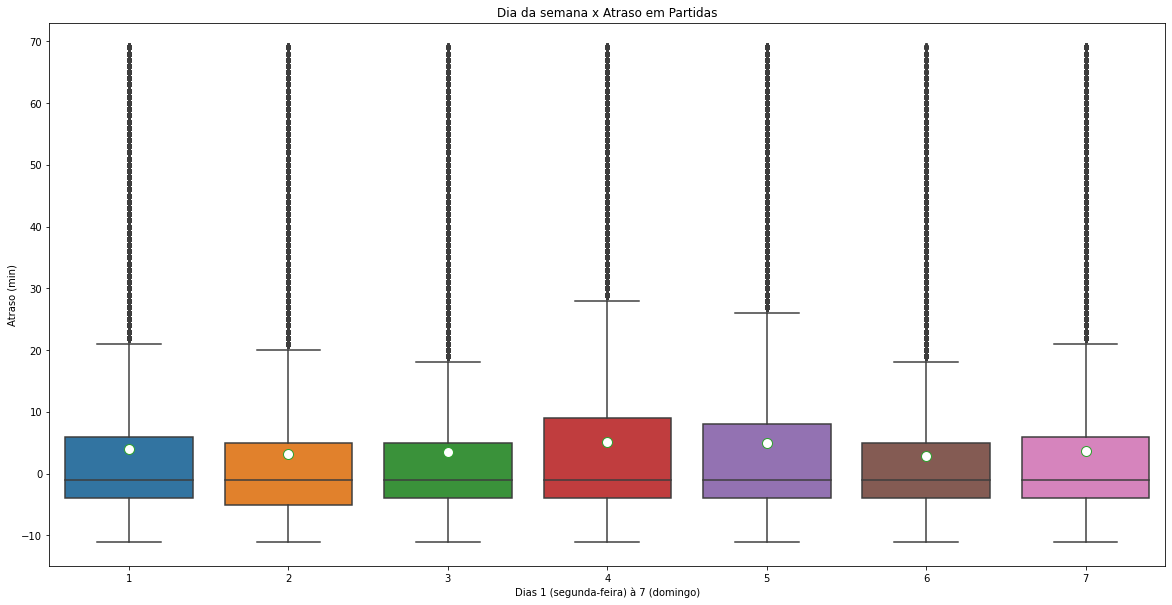

In [67]:
data = pd.DataFrame({'DayOfWeek': df_flights['DayOfWeek'], 'DepDelay': df_flights['DepDelay'].astype(int)})

plt.figure(figsize=(20,10))
sns.boxplot(x="DayOfWeek", y="DepDelay", data=data, showmeans=True, meanprops={"marker": "o", 
                "markerfacecolor": "white", "markersize": 10})

plt.title('Dia da semana x Atraso em Partidas')
plt.xlabel("Dias 1 (segunda-feira) à 7 (domingo)")
plt.ylabel("Atraso (min)")

No gráfico acima, também é possível notar que não há qualquer variação relevante se olharmos atrasos por dia da semana.

----------------------------------------------------------------

No gráfico acima, também é possível notar que não há qualquer variação relevante se olharmos atrasos por dia da semana.

## Partidas tardias tendem a resultar em atrasos de chegada mais longos do que partidas pontuais? // Late departures tend to result in longer arrival delays than punctual departures?

Text(0, 0.5, 'Atraso na chegada')

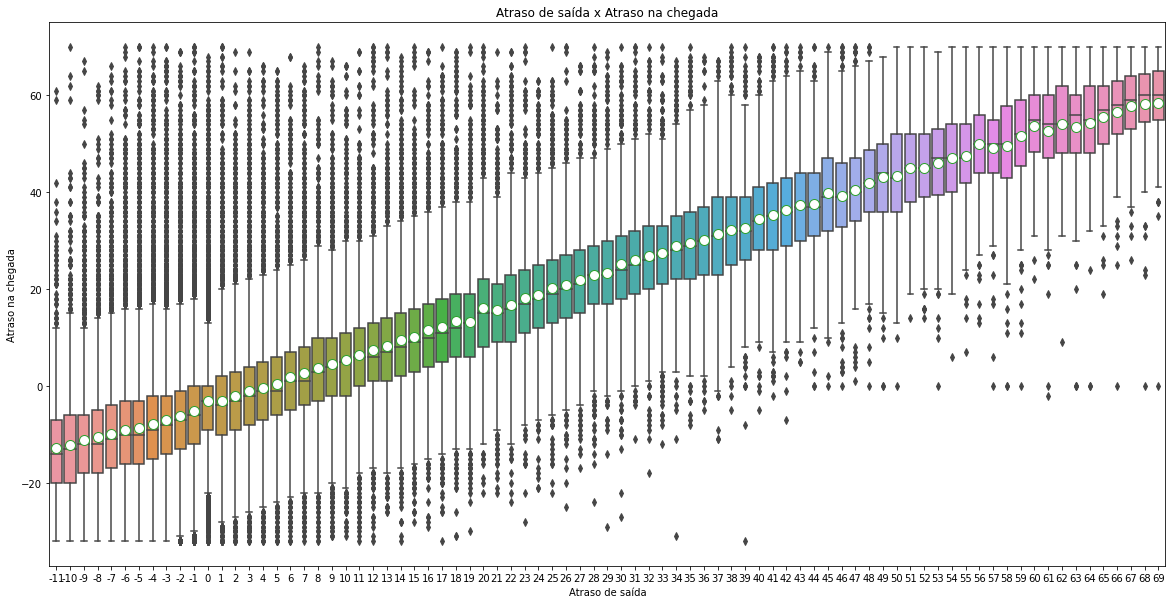

In [68]:
data = pd.DataFrame({'DepDelay': df_flights['DepDelay'], 'ArrDelay': df_flights['ArrDelay']})

plt.figure(figsize=(20,10))
sns.boxplot(x="DepDelay", y="ArrDelay", data=data, showmeans=True, meanprops={"marker": "o", 
                "markerfacecolor": "white", "markersize": 10})

plt.title('Atraso de saída x Atraso na chegada')
plt.xlabel("Atraso de saída")
plt.ylabel("Atraso na chegada")

Com o gráfico acima, se torna nítido a crescente relação que há considerando as duas variáveis citadas.

----------------------------------------------------------------

With the graph above, the growing relationship that exists considering the two variables mentioned becomes clear.

## Qual a rota que possui mais partidas tardias? // Which route has the most late departures?


In [69]:
from collections import Counter

In [70]:
#Montando todas as rotas
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
Los Angeles International > San Francisco International,203
San Francisco International > Los Angeles International,202
LaGuardia > Hartsfield-Jackson Atlanta International,134
Los Angeles International > McCarran International,128
McCarran International > Los Angeles International,125
...,...
Washington Dulles International > Lambert-St. Louis International,0
Bradley International > Cleveland-Hopkins International,0
Indianapolis International > Logan International,0


## Qual rota possui o maior atraso médio de chegada?

In [71]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Pittsburgh International > Raleigh-Durham International,63.000000
Southwest Florida International > Theodore Francis Green State,44.000000
Louis Armstrong New Orleans International > Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International > Philadelphia International,25.250000
Newark Liberty International > Will Rogers World,24.000000
...,...
Jacksonville International > Chicago Midway International,-20.000000
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
